In [1]:
from twitterscraper import query_tweets
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
%matplotlib inline

## 10k Trump Tweets from 2016

In [2]:
query = query_tweets("Trump", limit=10000, begindate=dt.date(2016, 1, 1), enddate=dt.date(2016, 12, 31), lang="english")

In [3]:
tweets_list = []
for tweet in query:
    tweets_list.append((tweet.fullname, tweet.id, tweet.likes, tweet.replies, tweet.retweets,
                        tweet.text, tweet.timestamp, tweet.user))

In [4]:
tweet_columns = ['fullname', 'id', 'likes', 'replies', 'retweets', 'text', 'timestamp', 'user']

In [5]:
tweets = pd.DataFrame(tweets_list, columns = tweet_columns)

In [6]:
len(tweets)

9283

In [7]:
tweets.text[353]

'#Trump would have been Stomped by @POTUS\n#Trump1Term lying whining sniffling Russian Loving Coward will be his Legacy! #TraitorTrump!'

In [8]:
counts = tweets['text'].groupby(tweets['timestamp'].dt.date).count()

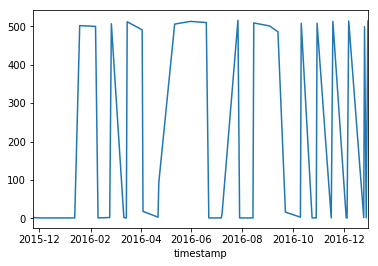

In [9]:
counts.plot()

In [22]:
# Read in the fake news database
news_df = pd.read_csv("fakenews.csv", header=None)
news_df

,0,1,2,3,4,5
0,100percentfedup.com,bias,NaN,NaN,NaN,NaN
1,365usanews.com,bias,conspiracy,NaN,NaN,NaN
2,4threvolutionarywar.wordpress.com,bias,conspiracy,NaN,NaN,NaN
3,aheadoftheherd.com,bias,NaN,NaN,"false quotes regarding banking, heavily promot...",NaN
4,americablog.com,bias,clickbait,NaN,domain for sale,NaN
5,americanlookout.com,bias,clickbait,NaN,NaN,NaN
6,americanpatriotdaily.com,bias,clickbait,bias,NaN,NaN
7,americanthinker.com,bias,NaN,NaN,"sites both reliable/not reliable sources, mix ...",NaN
8,americasfreedomfighters.com,bias,clickbait,NaN,NaN,NaN
9,AmmoLand.com,bias,NaN,NaN,NaN,NaN


In [11]:
# Filter the dataset for only definitively fake news sites - excludes 'bias', 'unreliable', 'political'
news_df = news_df[news_df.category.isin(['conspiracy', 'Conspiracy', 'fake',
                                         'fake news', 'hate', 'rumor', 'state'])]

In [12]:
news_df

,,site,category,category1,category2
extraclubmagazine.com,bias,clickbait,fake,vacillates between outright fake and misleadin...,NaN
heresyblog.net,bias,conspiracy,rumor,NaN,NaN
ihavethetruth.com,bias,clickbait,fake,NaN,NaN
politicalcult.com,bias,clickbait,conspiracy,NaN,NaN
pravda.ru,bias,rumor,conspiracy,NaN,NaN
pravdareport.com,bias,rumor,conspiracy,redirects to pravda.ru,NaN
sputniknews.com,bias,state,fake,NaN,NaN
therealstrategy.com,bias,conspiracy,hate,black lives matter content spews a lot of raci...,NaN
uschronicle.com,bias,conspiracy,hate,NaN,NaN
usherald.com,bias,conspiracy,fake,NaN,NaN
